In [1]:
import os
os.chdir("..")
import relegy.embeddings as rle
import relegy.metrics as rlm
import relegy.graphs as rlr
os.chdir("Analysis")

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import inspect
from IPython.display import clear_output
from matplotlib.pylab import rcParams
import sys

In [39]:
def get_embedding_methods_iterable():
    return filter(lambda x: x[0][:2] != "__", inspect.getmembers(sys.modules['relegy.embeddings']))

In [31]:
def generate_clusters_graph(n, k, out_density, in_density):
    partition = np.random.multinomial(n, np.ones(k)/k, size=1)[0]
    labels = np.repeat(np.arange(k), partition)
    G = nx.Graph()
    cur_min = 0
    for i in partition:
        ng = nx.complete_graph(range(cur_min, cur_min+i))
        G.add_nodes_from(ng)
        num_edges_left = np.floor(in_density*len(ng.edges)).astype(int)
        edges_ixs_left = np.random.choice(len(ng.edges), num_edges_left)
        G.add_edges_from(np.array(ng.edges)[edges_ixs_left, :])
        cur_min += i
    G1 = nx.complement(G)
    arr = np.arange(len(G1.edges))
    new_edges_size = np.floor(out_density*len(arr))
    new_edges = np.random.choice(arr, size=new_edges_size.astype(int))
    G.add_edges_from(np.array(G1.edges)[new_edges,:])
    return G, labels

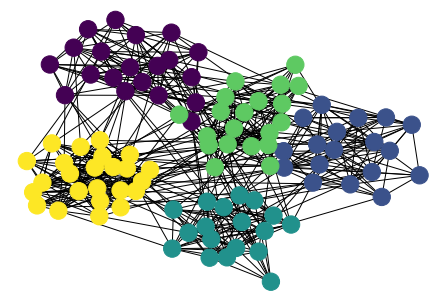

In [35]:
G, labels = generate_clusters_graph(100, 5, 0.03, 0.8)
nx.draw(G, node_color=labels)

In [10]:
np.arange(190)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [41]:
G, labels = generate_clusters_graph(100, 7, 0.03)

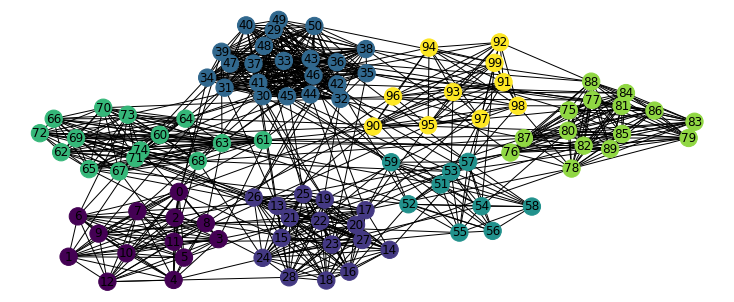

In [42]:
nx.draw(G, with_labels=True, node_color=labels)
plt.savefig("../../graf.png")

# LaplacianEigenmaps fast_embed

In [43]:
Z_le = rle.LaplacianEigenmaps.fast_embed(G, num_iter=300, d=3)

Iteration limit reached    (Exit mode 9)
            Current function value: [0.39905375]
            Iterations: 300
            Function evaluations: 1795
            Gradient evaluations: 300


In [44]:
Z_scaled = StandardScaler().fit_transform(Z_le)
Z_le_pca = PCA(n_components=2).fit_transform(Z_scaled)

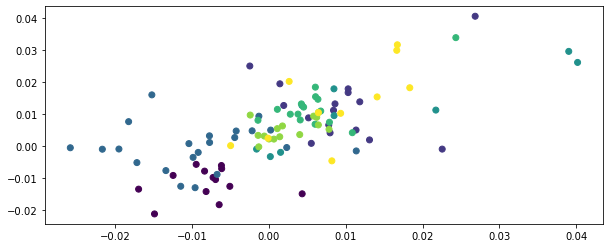

In [45]:
plt.scatter(Z_le[:, 0], Z_le[:, 1], c=labels)

# GraphFactorization

In [46]:
gf = rle.GraphFactorization(G)

gf.initialize(d = 2)
gf.initialize_model(lr=0.01)
gf.fit(num_iter = 300)
Z_gf = gf.embed()

Epoch 1: 843.2083
Epoch 2: 838.0728
Epoch 3: 831.255
Epoch 4: 822.5203
Epoch 5: 811.67914
Epoch 6: 798.59906
Epoch 7: 783.19
Epoch 8: 765.39087
Epoch 9: 745.1659
Epoch 10: 722.5062
Epoch 11: 697.4324
Epoch 12: 669.9961
Epoch 13: 640.2821
Epoch 14: 608.4103
Epoch 15: 574.53735
Epoch 16: 538.8602
Epoch 17: 501.61768
Epoch 18: 463.09283
Epoch 19: 423.6147
Epoch 20: 383.55878
Epoch 21: 343.34717
Epoch 22: 303.4462
Epoch 23: 264.3628
Epoch 24: 226.63756
Epoch 25: 190.83423
Epoch 26: 157.52426
Epoch 27: 127.265976
Epoch 28: 100.57626
Epoch 29: 77.89535
Epoch 30: 59.544964
Epoch 31: 45.68277
Epoch 32: 36.25927
Epoch 33: 30.986261
Epoch 34: 29.328205
Epoch 35: 30.526363
Epoch 36: 33.660202
Epoch 37: 37.741207
Epoch 38: 41.82392
Epoch 39: 45.112274
Epoch 40: 47.039192
Epoch 41: 47.30483
Epoch 42: 45.87085
Epoch 43: 42.918587
Epoch 44: 38.785206
Epoch 45: 33.89285
Epoch 46: 28.682507
Epoch 47: 23.560457
Epoch 48: 18.860748
Epoch 49: 14.824137
Epoch 50: 11.591785
Epoch 51: 9.2108755
Epoch 52: 7.6

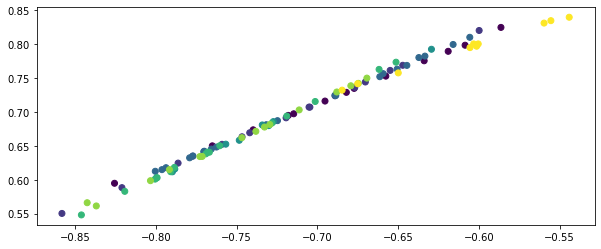

In [47]:
plt.scatter(Z_gf[:, 0], Z_gf[:, 1], c=labels)

In [48]:
obtained_matrix = Z_gf @ Z_gf.T

In [49]:
rmse = rlm.rmse(nx.to_numpy_array(G, nodelist=G.nodes), obtained_matrix)

patk = rlm.precision_at_k(nx.to_numpy_array(G, nodelist=G.nodes), obtained_matrix)

In [50]:
print(rmse)

0.9060431119642205


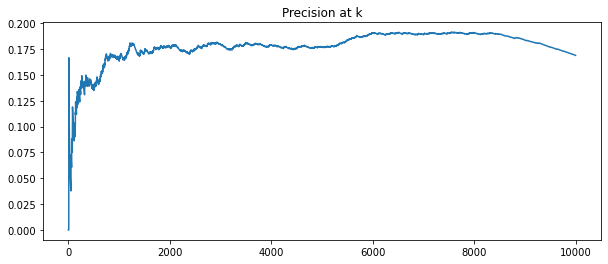

In [51]:
rcParams["figure.figsize"] = 10, 4
plt.plot(patk)
plt.title("Precision at k")
plt.show()

In [53]:
gf.fit(10)

Epoch 1: 5.0819445
Epoch 2: 5.0814924
Epoch 3: 5.081043
Epoch 4: 5.0805964
Epoch 5: 5.080152
Epoch 6: 5.0797114
Epoch 7: 5.079273
Epoch 8: 5.0788374
Epoch 9: 5.0784054
Epoch 10: 5.077975


In [13]:
results_dictionary = {}
for name, class_handle in get_embedding_methods_iterable():
    if not (name == "GCN" or name == "GNN"):
        print("Currently processing " + str(name))
        results_dictionary[name] = class_handle.fast_embed(G, d=2)
        clear_output()

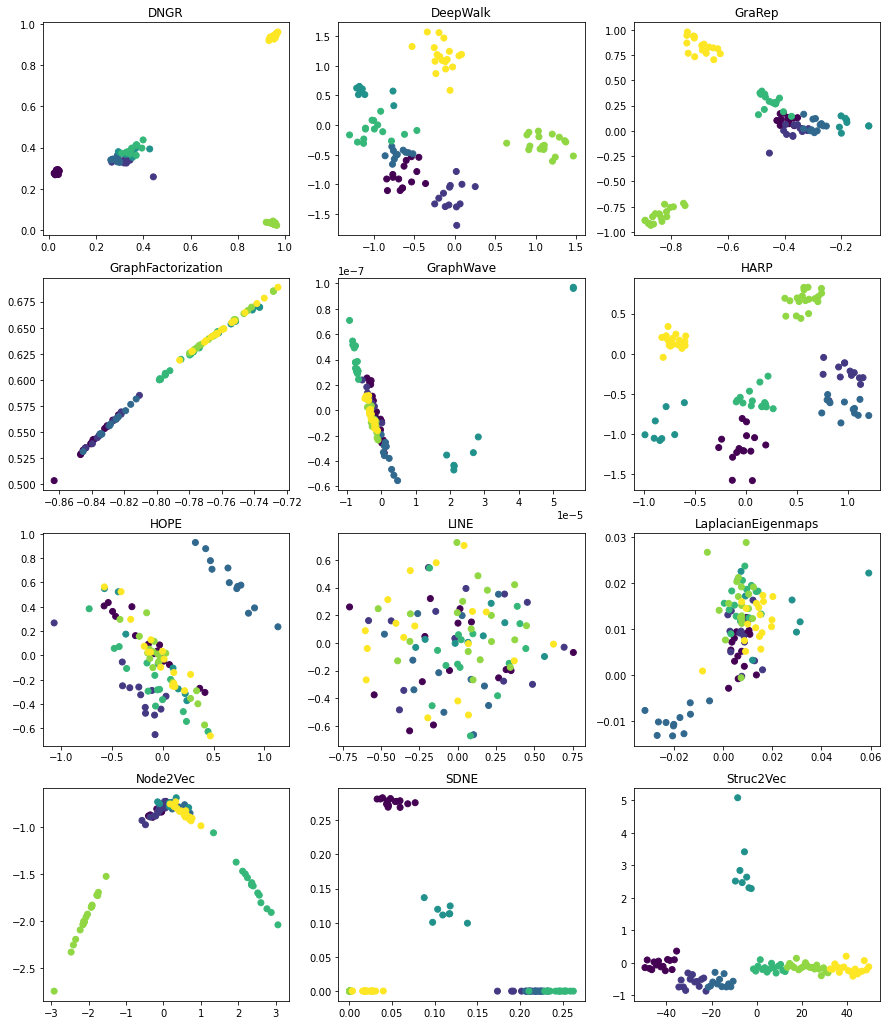

In [54]:
rcParams["figure.figsize"] = 15, 18
fig, axs = plt.subplots(4, 3)
names = list(results_dictionary.keys())
for i in range(len(names)):
    ix_x = i // 3
    ix_y = i % 3
    cur_Z = results_dictionary[names[i]]
    if cur_Z.shape[1] != 2:
        ss = StandardScaler().fit_transform(cur_Z)
        pca_Z = PCA(n_components=2).fit_transform(cur_Z)
        cur_Z = pca_Z
    axs[ix_x, ix_y].scatter(cur_Z[:, 0], cur_Z[:, 1], c=labels)
    axs[ix_x, ix_y].set_title(names[i])

In [18]:
results_dictionary = {}
for name, class_handle in get_embedding_methods_iterable():
    if not (name == "GCN" or name == "GNN"):
        print("Currently processing " + str(name))
        results_dictionary[name] = class_handle.fast_embed(G, d=5)
        clear_output()

In [ ]:
rle.GraphWave.fast_embed()

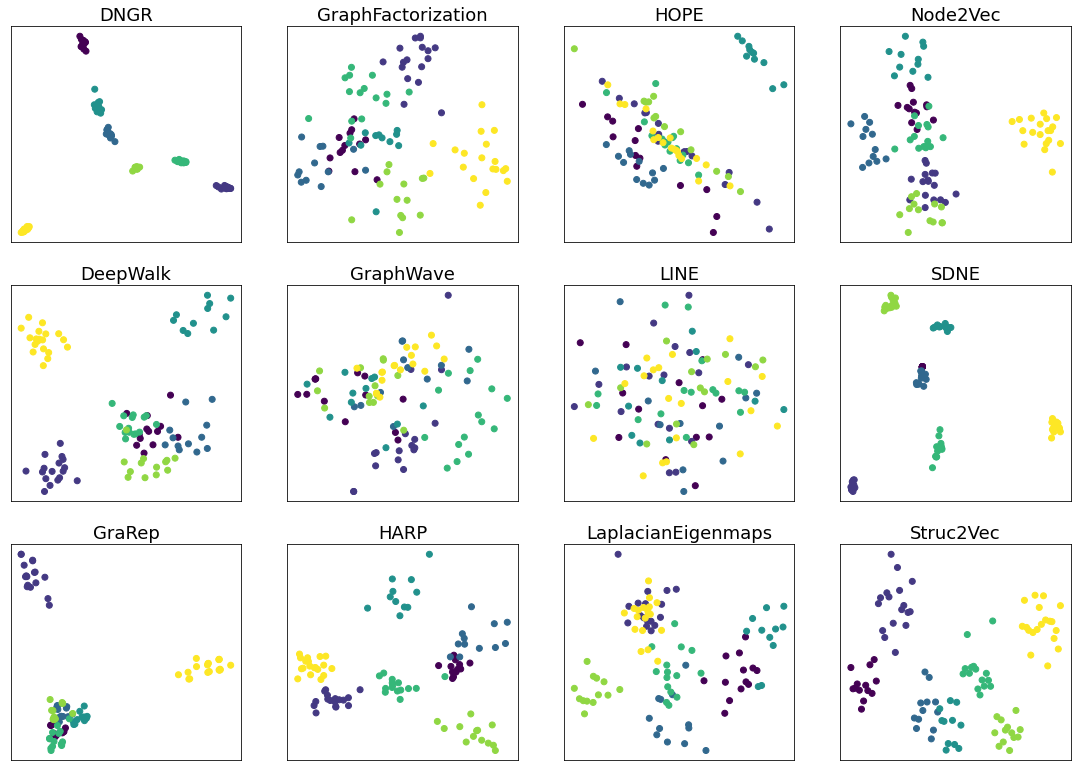

In [29]:
rcParams["figure.figsize"] = 19, 13.5
fig, axs = plt.subplots(3, 4)
names = list(results_dictionary.keys())
for i in range(len(names)):
    ix_x = i % 3
    ix_y = i // 3
    cur_Z = results_dictionary[names[i]]
    if cur_Z.shape[1] != 2:
        ss = StandardScaler().fit_transform(cur_Z)
        pca_Z = PCA(n_components=2).fit_transform(cur_Z)
        cur_Z = pca_Z
    axs[ix_x, ix_y].scatter(cur_Z[:, 0], cur_Z[:, 1], c=labels)
    axs[ix_x, ix_y].set_title(names[i], size=18)
    axs[ix_x, ix_y].set_xticks([])
    axs[ix_x, ix_y].set_yticks([])
plt.savefig("../../PCA.png")

In [54]:
import relegy.graphs as rlr

In [55]:
G = rlr.generate_graph("barbell", m1=20, m2=5)

kG, labels = rlr.get_karate_graph()

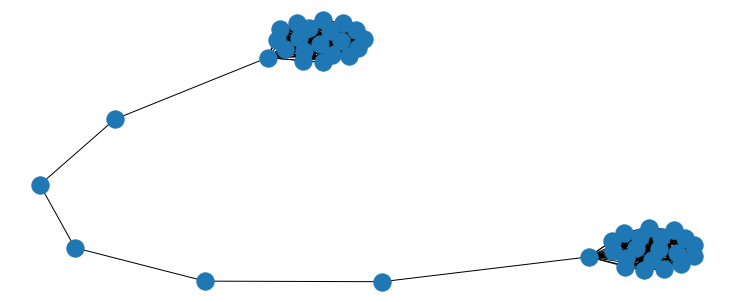

In [56]:
nx.draw(G)

In [57]:
node_labs = node_color=np.array(labels)[:, 1]
_, ix = np.unique(node_labs, return_inverse=True)

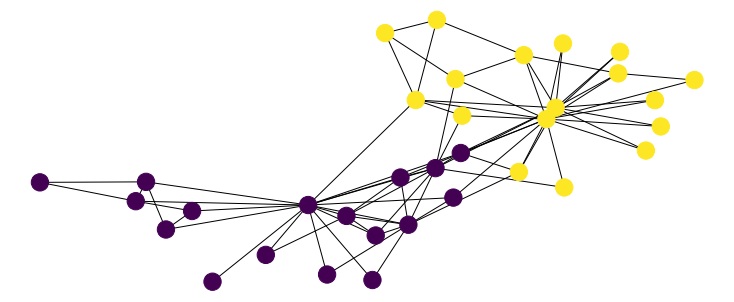

In [60]:
nx.draw(kG, node_color=ix)

In [61]:
gf.info()

description
|parameter name      |default value            |annotated type                            |stage           |
|graph               |no default               |networkx.classes.graph.Graph              |__init__        |
------------------------------------------------------------------------------------------------------------
|d                   |2                        |builtins.int                              |initialize      |
------------------------------------------------------------------------------------------------------------
|lmbd                |0.1                      |builtins.float                            |initialize      |
------------------------------------------------------------------------------------------------------------
|optimizer           |adam                     |builtins.str                              |initialize_model|
------------------------------------------------------------------------------------------------------------
|lr    